# **Transforming data in a pipeline**

- In a data pipeline, transforming data correctly is one of the most important measures of success of a data solution. 
- If data is curated in an incorrect format, or information is lost through the transformation process, downstream users may not be able to generate value from the output of a data pipeline. 
- Using pandas, it's easy to transform data. pandas provides powerful tools to manipulate tabular data, most of which can be executed in a single line of code. 
- With pandas, the sky's the limit. Rows can be filtered, columns can be created, data types can be changed, and so much more. 
- We'll explore loc and to_datetime to transform data.

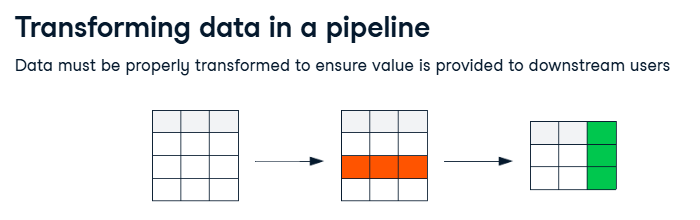

`pandas` provides powerful tools to transform tabular data

- `.loc[]`

- `.to_datetime()`

# **Filtering records with .loc[]**

- loc is used to filter DataFrames by row and column values, and is one of the most widely-used tools for manipulating DataFrames. 
- In our first statement, loc is called on the raw_stock_data DataFrame to keep only records with an "open" value greater than zero. 
- The statement inside the brackets creates an array of boolean values, with entry True if "open" is greater than 0, and False otherwise. 
- The colon after the comma signifies that all columns should be included in the resulting DataFrame. 
- In our second example, loc is used to filter all columns except "timestamps", "open", and "close". 
- All rows are maintained. These two statements can be combined into one! In a single line of code, all records with "open" greater than zero, and columns with labels "timestamps", "open", and "close" are preserved. 
- loc has a counterpart, iloc. iloc uses integer indexing, rather than loc's label-based and boolean indexing. 
- Here, iloc is used to return the first fifty rows and three columns of the DataFrame.

Filtering records with .loc[]

- `.loc[]` allows for both dimensions of a DataFrame to be transformed

In [ ]:
# Keep only non-zero entries
cleaned = raw_stock_data.loc[raw_stock_data["open"] > 0, :]

In [ ]:
# Remove excess columns
cleaned = raw_stock_data.loc[:, ["timestamps", "open", "close"]]

In [ ]:
# Combine into one step
cleaned = raw_stock_data.loc[raw_stock_data["open"] > 0, ["timestamps", "open", "close"]]

- `.iloc[]` uses integer indexing to filter DataFrames

In [ ]:
cleaned = raw_stock_data.iloc[[0:50], [0, 1, 2]]

# **Altering data types**

- Often, DataFrames contain columns whose data types need to be converted to a different type. 
- In particular, we'll take a look at transforming columns to type datetime using the to_datetime function. 
- The to_datetime function takes a single column to be converted to type datetime. 
- Here, the "timestamps" column is converted from a string in the format "YYYYmmddHHMMSS" to type datetime, using the format-string passed. 
- Our second example shows an integer also being converted to type datetime. 
- This integer represents the number of milliseconds that have elapsed since January 1, 1970, sometimes called a "Unix timestamp". 
- Timestamps are often the most difficult data type to work with, but pandas built-in functionality makes this a little easier. 
- Besides to_datetime, pandas offers several other tools to wrangle and transform data types.

Altering data types

- Data types often need to be converted for downstream use cases

  .to_datetime()

In [ ]:
# "timestamps" column correctly looks like: "20230101085731"
# Convert "timestamps" column to type datetime
cleaned["timestamps"] = pd.to_datetime(cleaned["timestamps"], format="%Y%m%d%H%M%S")

In [ ]:
Timestamp('2023-01-01 08:57:31')

In [ ]:
# "timestamps" column currently looks like: 1681596000011
# Convert "timestamps" column to type datatime
cleaned["timestamps"] = pd.to_datetime(cleaned["timestamps"], unit="ms")

In [ ]:
Timestamp ('2023-04-15 22:00:00.011000')

# **Validating transformations**

- Any time data is manipulated, there's a risk of losing valuable information, or creating faulty data. 
- Validating transformation helps to mitigate these risks. For now, we'll explore a few tools to manually inspect a DataFrame. 
- The head method is a great tool for outputting the first few rows of a DataFrame. 
- By default, the head method displays the first five rows of the DataFrame, but any integer can be passed. 
- This allows for a Data Engineer to quickly check the results of any transformations that were made, and perform a manual "spot-check" as a first form of validation. 
- In addition to the head method, the nsmallest and nlargest methods can be used to show the n-smallest or largest values in a list of columns passed. 
- These tools are especially useful when filtering data using a range.

Validating transformations

Transforming data comes with risks:
- Losing information
- Creating faulty data

In [ ]:
# Several ways to investigate a DataFrame
cleaned = raw_stock_data.loc[raw_stock_data["open"] > 0, ["timestamps", "open", "close"]]
print(cleaned.head())

In [ ]:
# Return smallest and largest records
print(cleaned.nsmallest(10, ["timestamps"]))
print(cleaned.nlargest(10, ["timestamps"]))